<a href="https://colab.research.google.com/github/lalitha-sahitya/Multiple-Objects-Classification/blob/main/multiple_image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import imagenet_utils
import cv2
from keras.preprocessing import image

In [74]:
model=tf.keras.applications.MobileNetV2(weights='imagenet')

In [83]:
model=tf.keras.applications.VGG19(weights='imagenet')

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [88]:
def detect(file_path):
  img=cv2.imread(file_path)
  img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  img=cv2.resize(img,(224,224))
  resized_img=image.img_to_array(img)
  final_img=np.expand_dims(resized_img,axis=0)
  final_img=tf.keras.applications.vgg19.preprocess_input(final_img)
  prediction=model.predict(final_img)
  results=imagenet_utils.decode_predictions(prediction)[0]
  return [res[1] for res in results]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


['traffic_light', 'totem_pole', 'pole', 'street_sign', 'parking_meter']

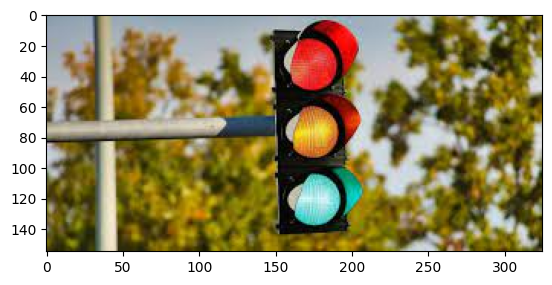

In [89]:
detect('/content/images.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 739ms/step


['power_drill', 'vacuum', 'chain_saw', 'sports_car', 'racer']

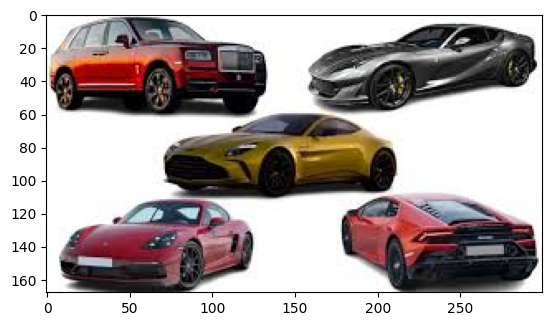

In [90]:
detect('/content/images (1).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


['grocery_store', 'lemon', 'cucumber', 'fig', 'pineapple']

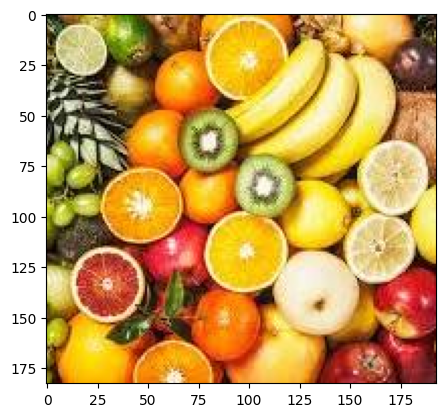

In [91]:
detect('/content/download (3).jpg')

In [92]:
model.save('vgg19_model.h5')